<a href="https://colab.research.google.com/github/kwanization/Machine_Learning_Study/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#유방암 데이터

plt.style.use(['seaborn-whitegrid'])

> 이거 안됨



In [79]:
import pandas as pd
import numpy as np
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(X_mesh)
    Z = Z.reshape(xx.shape)
    return plt.contourf(xx, yy, Z, **params)




sns.set_style('whitegrid')

In [55]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

In [56]:
cancer = load_breast_cancer()

## target > 0 = 악성(Malignant), 1 = 양성(Benign)

In [57]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 모델을 학습시키기 위해 데이터를 분할해보자

### x는 독립변수, y는 종속변수 0은 악성, 1은 양성
### 모델 학습하는데 80%쓰고, 평가하는데 20 씀

In [58]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 훈련 데이터를 데이터프레임으로 다시 이쁘게

In [59]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.34,26.86,81.15,477.4,0.10340,0.13530,0.108500,0.045620,0.1943,0.06937,...,39.34,101.70,768.9,0.17850,0.47060,0.44250,0.14590,0.3215,0.12050,0
1,11.63,29.29,74.87,415.1,0.09357,0.08574,0.071600,0.020170,0.1799,0.06166,...,38.81,86.04,527.8,0.14060,0.20310,0.29230,0.06835,0.2884,0.07220,1
2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
3,13.28,20.28,87.32,545.2,0.10410,0.14360,0.098470,0.061580,0.1974,0.06782,...,28.00,113.10,907.2,0.15300,0.37240,0.36640,0.14920,0.3739,0.10270,0
4,15.75,20.25,102.60,761.3,0.10250,0.12040,0.114700,0.064620,0.1935,0.06303,...,30.29,125.90,1088.0,0.15520,0.44800,0.39760,0.14790,0.3993,0.10640,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,11.14,14.07,71.24,384.6,0.07274,0.06064,0.045050,0.014710,0.1690,0.06083,...,15.82,79.62,453.5,0.08864,0.12560,0.12010,0.03922,0.2576,0.07018,1
451,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522,1
452,10.51,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.018750,0.1695,0.06556,...,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777,1
453,14.54,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,0.2303,0.07077,...,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410,0


### 이번엔 테스트 데이터를 데이터프레임으로 이쁘게

In [60]:
cancer_test_df = pd.DataFrame(data=X_test, columns=cancer.feature_names)
cancer_test_df['target'] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,14.260,18.17,91.22,633.1,0.06576,0.05220,0.024750,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1
1,11.360,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.02100,0.1601,0.05913,...,36.32,85.07,521.3,0.14530,0.16220,0.18110,0.08698,0.2973,0.07745,1
2,12.810,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,0.06133,...,16.15,86.70,570.7,0.11620,0.05445,0.02758,0.03990,0.1783,0.07319,1
3,17.290,22.13,114.40,947.8,0.08999,0.12730,0.096970,0.07507,0.2108,0.05464,...,27.24,137.90,1295.0,0.11340,0.28670,0.22980,0.15280,0.3067,0.07484,0
4,9.042,18.90,60.07,244.5,0.09968,0.19720,0.197500,0.04908,0.2330,0.08743,...,23.40,68.62,297.1,0.12210,0.37480,0.46090,0.11450,0.3135,0.10550,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.01770,0.1739,0.05677,...,32.84,84.58,547.8,0.11230,0.08862,0.11450,0.07431,0.2694,0.06878,1
110,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.00000,0.1930,0.07818,...,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382,1
111,11.520,14.93,73.87,406.3,0.10130,0.07808,0.043280,0.02929,0.1883,0.06168,...,21.19,80.88,491.8,0.13890,0.15820,0.18040,0.09608,0.2664,0.07809,1
112,19.180,22.49,127.50,1148.0,0.08523,0.14280,0.111400,0.06772,0.1767,0.05529,...,32.06,166.40,1688.0,0.13220,0.56010,0.38650,0.17080,0.3193,0.09221,0


### 데이터 전처리를 해보자, (스케일링)

### 평균이 0, 표준편차가 1이 되도록 >> 요것이 Z-score 정규화

### 왜하냐? 머신러닝은 특성 간의 스케일에 영향을 받기 때문에, 지난번 정효샘이 설명ㅎㅎ

In [61]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### 전처리를 했으니, KNN로 모델을 훈련시키자~

In [62]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9428571428571428
평가 데이터 점수: 0.9385964912280702


In [64]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

### KNN은 거리 기반 알고리즘이므로 스케일 조정을 해야 함

In [65]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9758241758241758
평가 데이터 점수: 0.956140350877193


### 파이프라인 구문을 통해 전처리와 모델을 한방에 해치워 보자

### 전처리 단계와 모델이 하나로 묶이기 때문에 실수 발생 가능성이 줄어든다~

### 테스트데이터에도 자동으로 스케일링이 되기 때문에 데이터 누수 방지도 됨

In [66]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

### 교차 검증해서 맞는지 봐야겠지?

### 파이프라인으로 스케일링이랑 모델 적용

### 전체 데이터

### 5겹 교차

### 가능한 CPU 쥐어짜

### 실행과정 출력해


In [67]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.2s finished


{'fit_time': array([0.00439978, 0.00446367, 0.00467706, 0.00357628, 0.0031476 ]),
 'score_time': array([0.0292089 , 0.03173614, 0.00388122, 0.00398183, 0.00243068]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [68]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [69]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [70]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


In [71]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [72]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [73]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


### 고차원의 데이터를 2차원으로 시각화 해보자

### 2차원으로 축소

### 고차원 데이터를 2D로 변환

In [74]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

### 축소된 데이터도 데이터프레임으로 이쁘게 해야겠지?

In [75]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,42.337463,-12.640097,0
1,42.500240,-9.928030,0
2,37.894382,-10.039126,0
3,-17.654438,1.451124,0
4,36.764866,-7.930646,0
...,...,...,...
564,44.029003,-9.311248,0
565,38.830563,-9.435006,0
566,22.498896,-2.705058,0
567,40.378845,-10.038561,0


### 2차원 데이터를 플롯으로 시각화 해봄

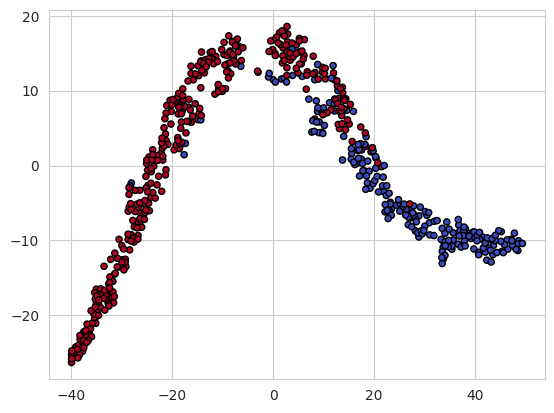

In [76]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

### 축소된 데이터로 KNN모델 학습

In [77]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)


In [ ]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

# 와인 데이터

In [30]:
wine = load_wine()

In [31]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [32]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
wine_train_df = pd.DataFrame(data=X_train, columns=wine.feature_names)
wine_train_df['target'] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0,2
1,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
2,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0,0
3,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550.0,2
4,12.60,1.34,1.90,18.5,88.0,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0,2
138,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,1
139,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
140,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1


In [34]:
wine_test_df = pd.DataFrame(data=X_test, columns=wine.feature_names)
wine_test_df['target'] = y_test
wine_test_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.400000,1.080,2.27,480.0,1
1,13.39,1.77,2.62,16.1,93.0,2.85,2.94,0.34,1.45,4.800000,0.920,3.22,1195.0,0
2,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.680000,1.120,3.48,510.0,1
3,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.280000,0.930,3.05,564.0,1
4,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290.0,0
5,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.700000,1.040,3.59,1035.0,0
6,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.250000,0.980,3.03,1120.0,0
7,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.040000,0.880,3.35,885.0,0
8,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.050000,0.906,1.82,870.0,1
9,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.060000,0.940,2.44,415.0,1


In [35]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [36]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7605633802816901
평가 데이터 점수: 0.8055555555555556


In [38]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [39]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9859154929577465
평가 데이터 점수: 0.9722222222222222


In [40]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)


In [41]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.4s finished


{'fit_time': array([0.00444031, 0.00464368, 0.00351763, 0.00354505, 0.00322056]),
 'score_time': array([0.00724721, 0.00670481, 0.00677609, 0.00695181, 0.00489116]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [42]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)


In [43]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [44]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [45]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [46]:
gs.best_estimator_


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [47]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9665079365079364


In [48]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [49]:
wine_comp_df = pd.DataFrame(data=X_comp)
wine_comp_df['target'] = y
wine_comp_df

,0,1,target
0,11.885133,-0.480538,0
1,11.506394,-1.147849,0
2,14.050035,-1.015527,0
3,16.863930,-1.384284,0
4,3.268320,-0.451542,0
...,...,...,...
173,3.289910,-0.019914,2
174,3.707676,-0.103938,2
175,6.272249,-0.490825,2
176,6.423851,-0.620846,2


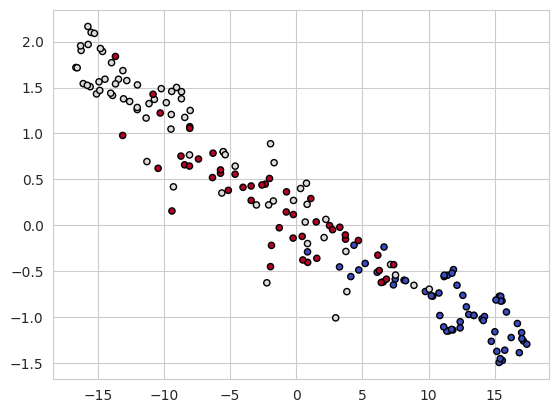

In [50]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [51]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)


### 도움!!!!!

In [53]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

NameError: name 'make_meshgrid' is not defined

#캘리포니아 주택 가격 데이터

In [6]:
california = fetch_california_housing()

In [7]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 훈련용 데이터 데이터프레임으로 이쁘게

In [9]:
california_train_df = pd.DataFrame(data=X_train, columns=california.feature_names)
california_train_df['TARGET'] = y_train
california_train_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,3.6875,36.0,5.327526,1.010453,1271.0,4.428571,33.99,-118.10,1.75200
1,1.4732,28.0,4.960784,0.980392,201.0,3.941176,38.03,-121.16,1.56300
2,1.7642,39.0,3.438413,0.997912,2176.0,4.542797,32.71,-117.14,0.82900
3,7.4353,7.0,7.762408,1.052889,3926.0,3.194467,37.67,-121.90,3.89800
4,2.4559,28.0,4.681529,1.070064,811.0,2.582803,40.89,-124.01,0.75600
...,...,...,...,...,...,...,...,...,...
16507,1.9338,44.0,3.103774,1.028302,869.0,4.099057,32.70,-117.14,0.89400
16508,3.5938,36.0,5.743842,1.064039,504.0,2.482759,39.15,-123.22,1.22100
16509,3.7596,21.0,4.112228,1.105528,1015.0,1.700168,32.84,-117.28,3.81300
16510,6.1407,52.0,6.914286,1.050549,1143.0,2.512088,37.79,-122.49,5.00001


In [10]:
california_test_df = pd.DataFrame(data=X_test, columns=california.feature_names)
california_test_df['TARGET'] = y_test
california_test_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,4.3194,34.0,5.225490,0.960784,819.0,2.676471,34.22,-118.56,1.970
1,6.6176,18.0,6.464380,1.073879,2984.0,3.936675,37.45,-121.90,2.762
2,5.4850,3.0,8.543029,1.480320,4249.0,2.834556,34.15,-117.57,3.431
3,2.0467,35.0,2.410088,1.094298,3441.0,3.773026,34.09,-118.29,1.583
4,2.7656,36.0,5.286408,1.177184,914.0,2.218447,34.11,-118.06,2.395
...,...,...,...,...,...,...,...,...,...
4123,5.0424,45.0,5.540351,0.975439,687.0,2.410526,33.83,-118.12,2.259
4124,4.8438,36.0,5.449721,1.019553,1254.0,3.502793,33.85,-117.96,1.857
4125,4.1250,34.0,4.283465,0.850394,348.0,2.740157,33.21,-117.23,1.646
4126,3.1964,29.0,3.977901,0.961326,1045.0,5.773481,33.74,-117.88,1.519


### 스케일링을 해봅세

In [11]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### KNN을 회귀로 적용

In [12]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

### 스케일링을 안했음

In [13]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.4472831369354199
평가 데이터 점수: 0.15070013255686043


### 스케일링을 했음, 모델이 정상적으로 거리 기반으로 계산 가능

In [14]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

### KNN 회귀성능을 결정계수 기준으로 평가

In [15]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.7926656540954116
평가 데이터 점수: 0.6845283171096486


### 파이프라인

In [16]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)


### 교차검증 5겹으로

In [17]:
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    5.3s finished


{'fit_time': array([0.04923844, 0.05253148, 0.0446887 , 0.07910299, 0.06025982]),
 'score_time': array([1.29158688, 0.81749296, 1.00190306, 1.1065619 , 0.78754377]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

### 파이프라인을 이렇게 만드는 이유는, 그리드서치를 쉽게 하기 위해서

In [19]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())]
)

### 회귀모델 하이퍼파라미터 조합 정의

In [20]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

### 하이퍼파라미터 튜닝 준비

In [21]:
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [22]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [23]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='brute', n_neighbors=7,
                                     weights='distance'))])

### 그리드서치가 찾은 최고 평균의 교차검증 점수 출력

### 1에 가까울수록 예측 성능이 높음

In [24]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.5376515274379834


### 차원축소 ㄱㄱ

In [25]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)

In [ ]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target'] = y
boston_comp_df


,0,target
0,43.540730,0
1,43.595871,0
2,40.278904,0
3,-21.389765,0
4,39.472610,0
...,...,...
564,44.902367,0
565,40.841774,0
566,26.277147,0
567,41.925262,0


In [26]:
california_comp_df = pd.DataFrame(data=X_comp, columns=['tsne_1d'])
california_comp_df['target'] = y
california_comp_df

,tsne_1d,target
0,-116.769104,4.526
1,89.227425,3.585
2,-98.721977,3.521
3,-90.616730,3.413
4,-89.922958,3.422
...,...,...
20635,-46.852879,0.781
20636,-113.767998,0.771
20637,-23.147985,0.923
20638,-61.939793,0.847


<ipython-input-27-2e14203f0af2>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


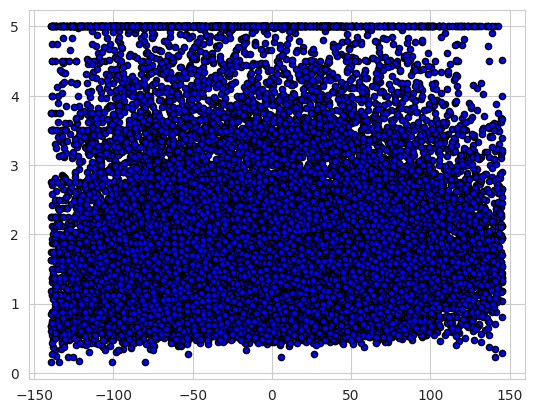

In [27]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [28]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)


<ipython-input-29-22c7a1c6cf03>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
<ipython-input-29-22c7a1c6cf03>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


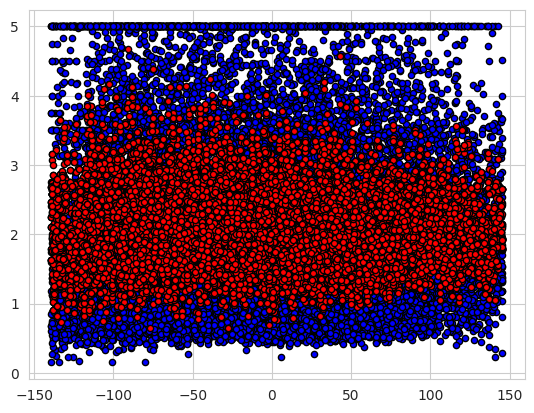

In [29]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k');